In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [43]:
features_path = "../data/processed/features.csv"
model_path = "../models/Random_Forest_best.pkl"

df = pd.read_csv(features_path)
print("✅ Features loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns)


✅ Features loaded successfully!
Shape: (2833, 11)
Columns: Index(['defect_code', 'mean_R', 'mean_G', 'mean_B', 'std_R', 'std_G', 'std_B',
       'contrast', 'smoothness', 'entropy', 'edge_density'],
      dtype='object')


In [44]:
X = df.drop("defect_code", axis=1)
y = df["defect_code"]

# Remove classes that appear only once
counts = y.value_counts()
valid_classes = counts[counts > 1].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

print(f"✅ Filtered dataset: {len(valid_classes)} defect codes remain")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

✅ Filtered dataset: 55 defect codes remain
Train size: (2243, 10), Test size: (561, 10)


In [45]:
model = joblib.load(model_path)
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [46]:
y_pred = model.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       424
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        19
 

d:\SmartMill_Analytics\venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\SmartMill_Analytics\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\SmartMill_Analytics\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\SmartMill_Analytics\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

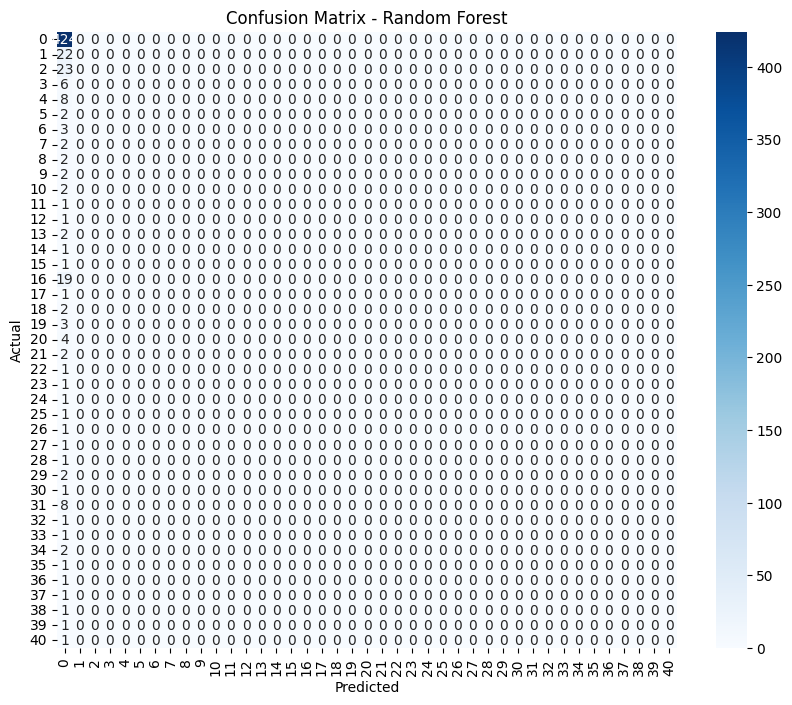

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

d:\SmartMill_Analytics\venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



🧾 Sample Predictions:
   True Label  Predicted Label  Confidence
0           0                0    0.486667
1           0                0    0.486667
2           0                0    0.486667
3           0                0    0.486667
4           9                0    0.486667
5           0                0    0.486667
6           0                0    0.486667
7          27                0    0.486667
8           0                0    0.486667
9           2                0    0.486667


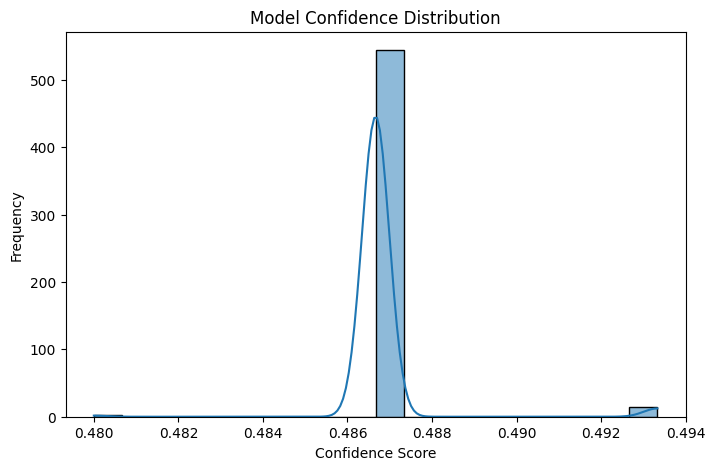

In [48]:
if hasattr(model, "predict_proba"):
    probs = model.predict_proba(X_test)
    df_pred = pd.DataFrame({
        "True Label": y_test.values,
        "Predicted Label": y_pred,
        "Confidence": np.max(probs, axis=1)
    })
else:
    df_pred = pd.DataFrame({
        "True Label": y_test.values,
        "Predicted Label": y_pred,
        "Confidence": np.nan
    })

print("\n🧾 Sample Predictions:")
print(df_pred.head(10))

# Plot confidence distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_pred["Confidence"], bins=20, kde=True)
plt.title("Model Confidence Distribution")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

In [49]:
report_path = "../reports/model_evaluation_report.csv"
df_pred.to_csv(report_path, index=False)
print(f"\n💾 Evaluation results saved to: {report_path}")

print("\n🎯 Model Evaluation Completed Successfully!")


💾 Evaluation results saved to: ../reports/model_evaluation_report.csv

🎯 Model Evaluation Completed Successfully!
